# Data Science Lab, introduzione

## Sommario

Il corso sarà tenuto sia con R che con Python; l'esame sarà svolto con un progetto di gruppo (3-4 persone al massimo) su un dataset offerto dal docente (o proposto) fingendo di presentarlo ad un generico committente senza competenze statistiche.
Si potrà scegliere il linguaggio usato (anche usarli entrambi).

## Introduzione a R

R, a differenza di Python, è stato pensato per l'analisi statistica; il gruppo di lavoro guidato da Wickham ha espanso il linguaggio programmando un pacchetto, `tidyverse`, per l'analisi di dati.
Inoltre sono di aiuto anche i pacchetti `lubridate` e `tidyr`.
Per ottimizzare il programma si può estendere con funzioni C++, inoltre col pacchetto `rcpp` si possono costruire delle interfacce tra i due programmi.

Per usare R, l'editor più usato è R-Studio; si usa anche Jupyter Notebook per programmare col kernel iR (installabile in locale, ma anche disponibile con Azure Notebooks o Kaggle).

In [1]:
set.seed(20190430)

### Task 1, operazioni tra vettori

Il linguaggio R non possiede l'elemento scalare ma solamente vettori; inoltre, essendo interpretato, è particolarmente lento sui cicli (tramite funzioni del tipo `apply`).
Le variabili sono _dinamiche_, quindi il tipo è assegnato in modo dinamico.

Ai vettori è possibile assegnare una _label_ per identificare i valori (come alternativa si possono usare i numeri indice, che partono da 1).

Le matrici sono elementi diverse dai vettori: le operazioni lecite sono diverse.

In [2]:
A <- matrix(runif(25), 5, 5,
            dimnames = list(
              paste0("r", 1:5),
              paste0("c", 1:5)
            ))
A

,c1,c2,c3,c4,c5
r1,0.695323335,0.23139219,0.13497013,0.6822604,0.7272646
r2,0.824954963,0.11666554,0.10351494,0.3272514,0.3006179
r3,0.890434546,0.04823888,0.68804389,0.2397110,0.8519023
r4,0.483256648,0.66624832,0.40957092,0.1841599,0.5131824
r5,0.002706723,0.53662882,0.01377894,0.8054028,0.4103904


In [3]:
B <- t(A) %*% A
B <- crossprod(A)  # più prestante di circa un ordine di grandezza
B

,c1,c2,c3,c4,c5
c1,2.1904432,0.6235112,0.9898663,1.0489827,1.7613531
c2,0.6235112,0.8013375,0.3567682,0.7625107,0.8065841
c3,0.9898663,0.3567682,0.6702749,0.3774160,0.9312629
c4,1.0489827,0.7625107,0.3774160,1.3126227,1.2238090
c5,1.7613531,0.8065841,0.9312629,1.2238090,1.7767988


In [4]:
library(MASS)
C <- solve(B)  # ma siccome B è diagonizzabile facilmente perchè simmetrica...
## Si diagonalizza B (Cholesky) e si calcola più facilmente l'inversa
C <- chol2inv(chol(B))  # che ne raddoppia la velocità
C

2.8438642,0.6933958,1.120850,1.318596,-4.629588
0.6933958,3.8871481,-5.268349,-4.431652,3.361713
1.1208498,-5.2683489,38.304965,24.243938,-35.494614
1.3185956,-4.4316522,24.243938,18.169880,-24.517100
-4.6295878,3.3617126,-35.494614,-24.517100,39.116359


In [5]:
apply(A, 2, mean)

c1        c2        c3        c4        c5 
0.5793352 0.3198348 0.2699758 0.4477571 0.5606715

In [6]:
apply(A, 2, sd)

c1        c2        c3        c4        c5 
0.3578745 0.2691961 0.2765142 0.2784738 0.2264046

In [7]:
is.matrix(A[1, , drop=FALSE])

[1] TRUE

Usando la matrice B come matrice di varianza-covarianza, si possono generare dei dati campionari con varianza e covarianza arbitrari: si moltiplica la matrice contenente gli errori alla fattorizzazione di Cholesky della matrice di varianza/covarianza.

In [8]:
S <- B
E <- matrix(rnorm(1000*5), 1000, 5)
X <- E %*% chol(S)
round(var(X) - S, 4)

,c1,c2,c3,c4,c5
c1,0.0028,0.0090,0.0084,0.0180,0.0111
c2,0.0090,0.0134,0.0091,0.0031,0.0086
c3,0.0084,0.0091,0.0045,-0.0003,0.0043
c4,0.0180,0.0031,-0.0003,0.0345,0.0138
c5,0.0111,0.0086,0.0043,0.0138,0.0072


### Task 2, Data.frame

La classe `data.frame` permette la gestione di tabelle di dati di tipi diversi: ogni colonna ha un tipo definito che può essere diverso da quello delle altre colonne.

In [9]:
df <- data.frame(
  class = sample(letters[1:4], 100, TRUE),
  sex   = sample(c("M", "F"), 100, TRUE),
  age   = rpois(100, 40))
head(df)

class,sex,age
c,F,38
c,M,50
c,F,40
a,F,43
d,F,39
d,F,38


In [10]:
summary(df)

 class  sex         age       
 a:20   F:55   Min.   :24.00  
 b:30   M:45   1st Qu.:37.00  
 c:25          Median :40.00  
 d:25          Mean   :40.17  
               3rd Qu.:44.00  
               Max.   :58.00  

In [11]:
## tapply(df$age, df$class, mean)  # oppure, con un approccio più OO
by(df$age, df$class, mean)

df$class: a
[1] 39.4
------------------------------------------------------------ 
df$class: b
[1] 40.06667
------------------------------------------------------------ 
df$class: c
[1] 40.72
------------------------------------------------------------ 
df$class: d
[1] 40.36

In [12]:
ct <- table(df$class, df$sex)
ct

   
     F  M
  a 12  8
  b 17 13
  c 17  8
  d  9 16

In [13]:
addmargins(ct)

,F,M,Sum
a,12,8,20
b,17,13,30
c,17,8,25
d,9,16,25
Sum,55,45,100


In [14]:
prop.table(ct)

   
       F    M
  a 0.12 0.08
  b 0.17 0.13
  c 0.17 0.08
  d 0.09 0.16

In [15]:
addmargins(prop.table(ct))

,F,M,Sum
a,0.12,0.08,0.20
b,0.17,0.13,0.30
c,0.17,0.08,0.25
d,0.09,0.16,0.25
Sum,0.55,0.45,1.00


In [16]:
summary(ct)

Number of cases in table: 100 
Number of factors: 2 
Test for independence of all factors:
	Chisq = 5.589, df = 3, p-value = 0.1334

### Stringhe

Le stringhe sono gestite in R come array di caratteri 

In [17]:
a <- "data science is cool"
a

[1] "data science is cool"

In [18]:
b <- strsplit(a, " ", fixed = TRUE)[[1]]  # fixed = FALSE per usare regex
b

[1] "data"    "science" "is"      "cool"

In [19]:
nchar(b)

[1] 4 7 2 4

In [20]:
grep("a", b, fixed = TRUE)

[1] 1

### Iris

In [21]:
library(dplyr)


Attaching package: ‘dplyr’

The following object is masked from ‘package:MASS’:

    select

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [22]:
data(iris)
iris$Sepal.Product <- iris$Sepal.Length * iris$Sepal.Width
ir <- iris[, -6]

Si può usare l'oggetto `tibble` in alternativa al `data.frame`, dal pacchetto `tidyverse`.
`tibble` è incentrato sulla facilità d'uso, alternativa più prestante è `data.table`.

In [23]:
ir %>%
  mutate(Sepal.Product = Sepal.Length * Sepal.Width) -> ir
ir %>% select(-Sepal.Product) -> ir

In [24]:
iris2 <- with(iris, iris[Petal.Length >= 1 &
                         Petal.Length <= 2,])
ir %>% filter(Petal.Length >= 1,
              Petal.Length <= 2) -> ir2

In [25]:
by(iris[,-5], iris$Species, colMeans)

iris$Species: setosa
 Sepal.Length   Sepal.Width  Petal.Length   Petal.Width Sepal.Product 
       5.0060        3.4280        1.4620        0.2460       17.2578 
------------------------------------------------------------ 
iris$Species: versicolor
 Sepal.Length   Sepal.Width  Petal.Length   Petal.Width Sepal.Product 
       5.9360        2.7700        4.2600        1.3260       16.5262 
------------------------------------------------------------ 
iris$Species: virginica
 Sepal.Length   Sepal.Width  Petal.Length   Petal.Width Sepal.Product 
       6.5880        2.9740        5.5520        2.0260       19.6846 

In [26]:
ir %>% group_by(Species) %>%
  summarise(mean.Sepal.Length = mean(Sepal.Length),
            mean.Sepal.Width  = mean(Sepal.Width),
            mean.Petal.Length = mean(Petal.Length),
            mean.Petal.Width  = mean(Petal.Width))

Species,mean.Sepal.Length,mean.Sepal.Width,mean.Petal.Length,mean.Petal.Width
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [27]:
reg <- by(iris[, -5], iris[,5], function(x) {
  lm(Sepal.Length ~ ., x)
})
lapply(reg, summary)

$setosa

Call:
lm(formula = Sepal.Length ~ ., data = x)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.13995 -0.01782  0.01004  0.02688  0.05630 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    4.808294   0.098935  48.600   <2e-16 ***
Sepal.Width   -1.364911   0.058172 -23.463   <2e-16 ***
Petal.Length   0.077750   0.038470   2.021   0.0492 *  
Petal.Width   -0.026959   0.064188  -0.420   0.6765    
Sepal.Product  0.276373   0.007613  36.302   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04357 on 45 degrees of freedom
Multiple R-squared:  0.986,	Adjusted R-squared:  0.9847 
F-statistic: 790.7 on 4 and 45 DF,  p-value: < 2.2e-16


$versicolor

Call:
lm(formula = Sepal.Length ~ ., data = x)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.203540 -0.021560  0.006672  0.031475  0.100906 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Int

### Grafici

Si disegna un grafico `lunghezza sepali vs. lunghezza petali` evidenziando la retta interpolante.

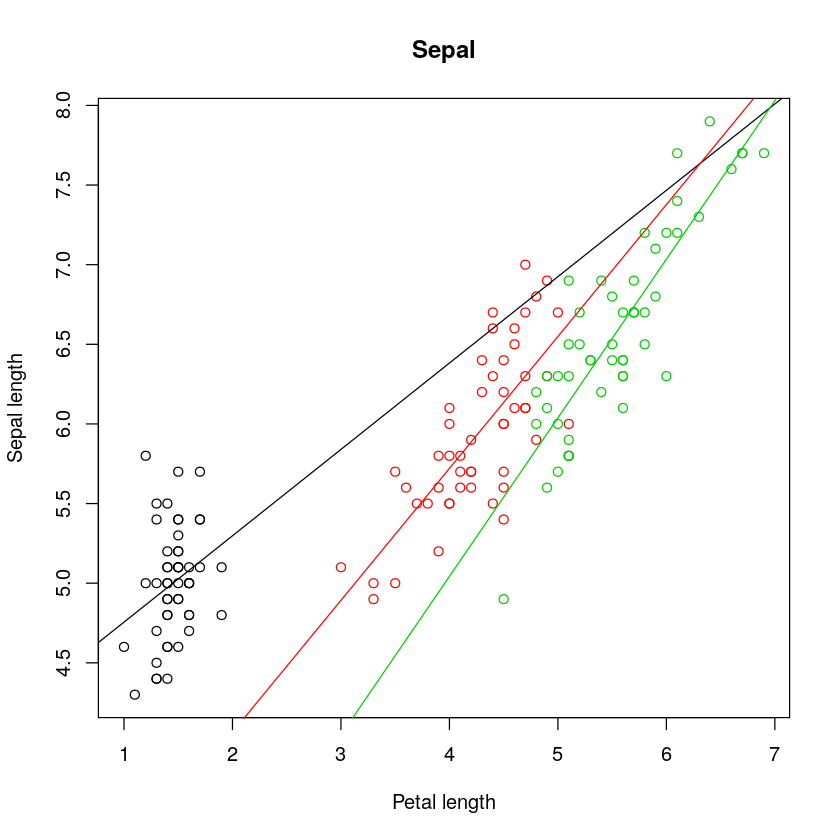

In [28]:
plot(iris$Sepal.Length ~ iris$Petal.Length,
     col=iris$Species,
     main="Sepal",
     xlab="Petal length",
     ylab="Sepal length")
abline(lm(Sepal.Length ~ Petal.Length,
          iris[iris$Species=="setosa",]),
       col=1)
abline(lm(Sepal.Length ~ Petal.Length,
           iris[iris$Species=="versicolor",]),
       col=2)
abline(lm(Sepal.Length ~ Petal.Length,
          iris[iris$Species=="virginica",]),
       col=3)

È possibile allo stesso modo costruire il grafico con la libreria `ggplot2`.

In [29]:
library(ggplot2)

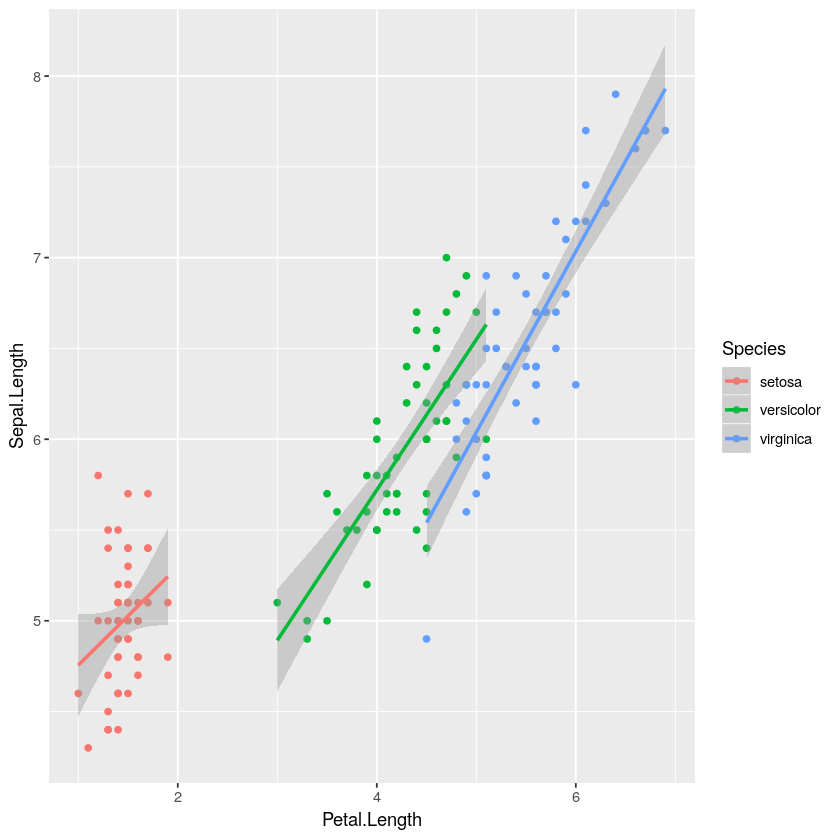

In [30]:
ggplot(data=iris,
       aes(x=Petal.Length,
           y=Sepal.Length,
           color=Species)) +
  geom_point() +
  geom_smooth(method="lm")

Per evidenziare la differenza di lunghezza del petalo tra le varie specie si costruisce un altro grafico.

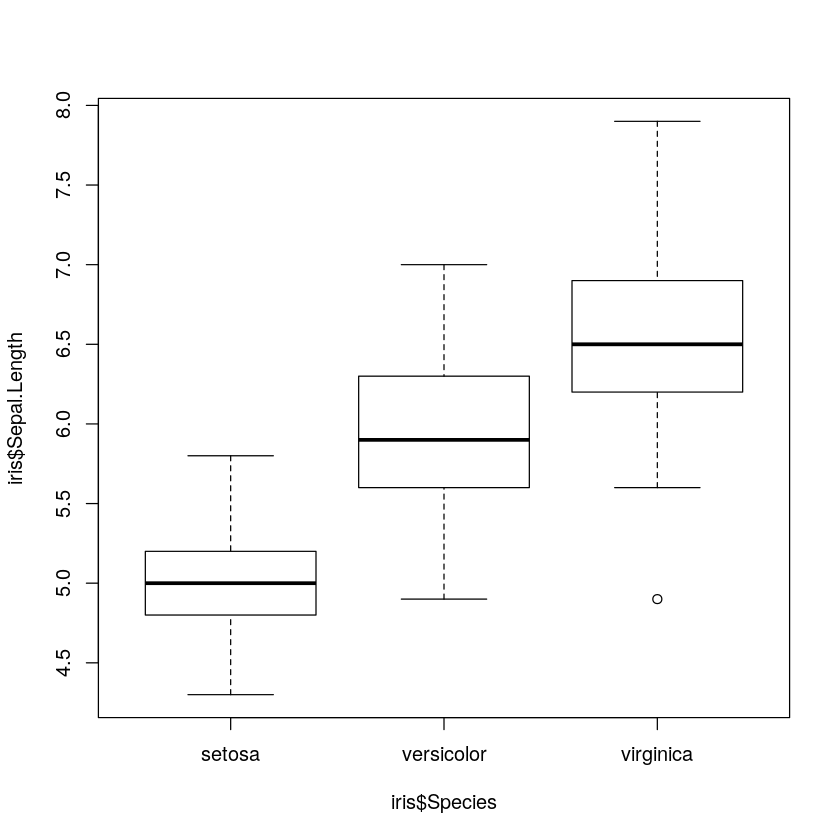

In [31]:
plot(iris$Sepal.Length ~ iris$Species)

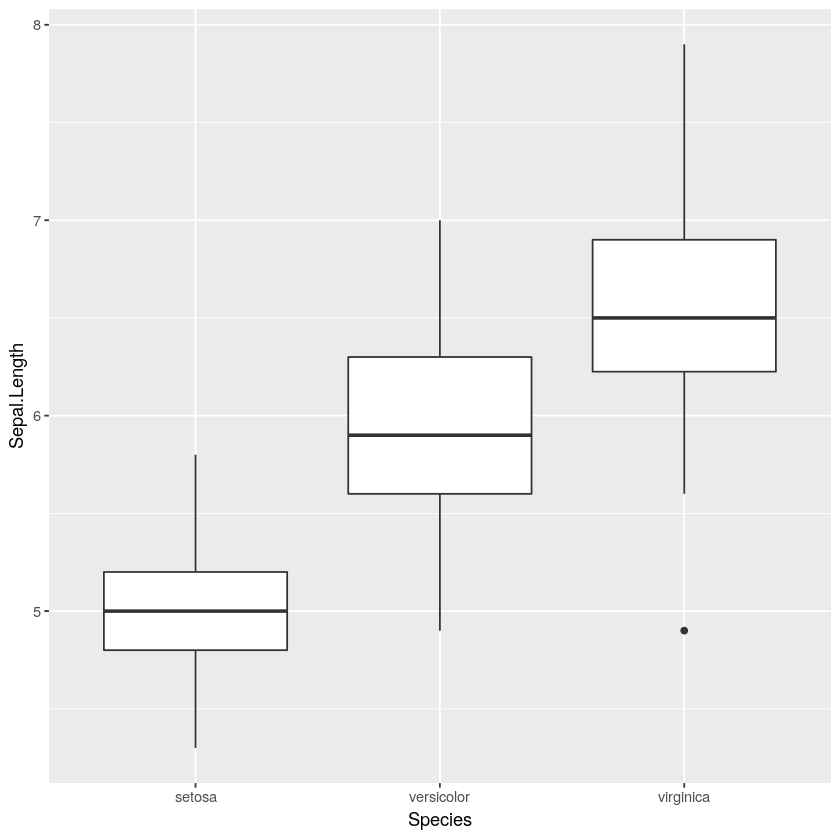

In [32]:
ggplot(data=iris,
       aes(x=Species,
           y=Sepal.Length)) +
  geom_boxplot()

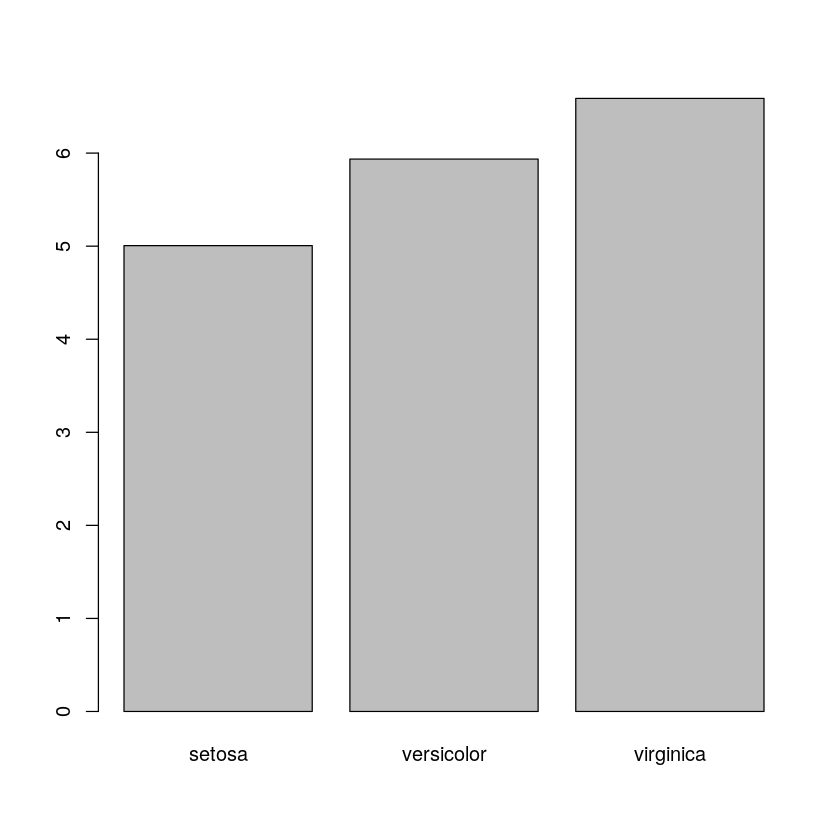

In [33]:
barplot(tapply(iris$Sepal.Length, iris$Species, mean))

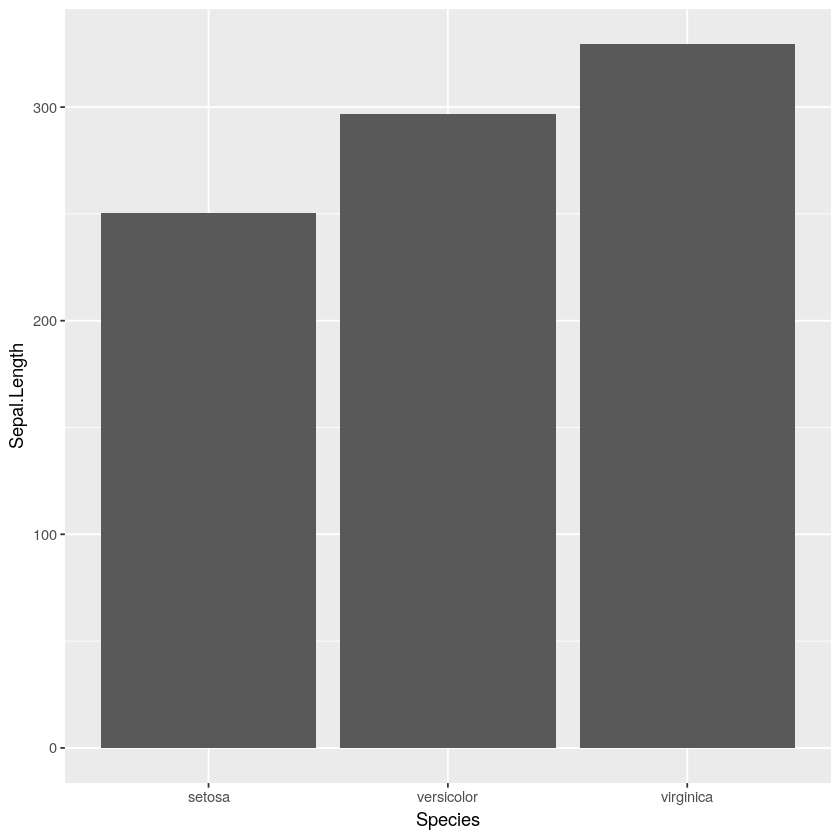

In [34]:
ggplot(data=iris,
       aes(x=Species,
           y=Sepal.Length)) +
  geom_col()

### Definizione classi e oggetti

La regressione lineare prevede la stima dei coefficienti $\hat{\beta} = (X^{\prime}X)^{-1} X^{\prime} y$ con $\hat{\beta} \sim N(\beta, \sigma^2(X^{\prime} X)^-1)$ (con $\sigma^2 = \frac{1}{n}\sum(y - \hat{y})^2$, anche se di fatto si usa la stima _corretta_ $\hat{s}^2 = \frac{1}{n-k}\sum(y - \hat{y})^2$).

In [35]:
reg <- function(y, x, intercept=TRUE) {
  if (intercept) {
    x <- cbind(Intercept=1, x)
  }
  x <- as.matrix(x)
  y <- as.matrix(y)
  ## p×n n×p
  tXX <- crossprod(x)
  B <- chol2inv(chol(tXX)) %*% crossprod(x, y)
  rownames(B) <- colnames(x)
  y.hat <- x %*% B
  e <- y - y.hat
  df <- length(y) - ncol(x)
  s2 <- sum(e^2) / df
  covar <- s2 * tXX
  structure(list(coefficients=B,
                 y=y,
                 x=x,
                 residuals=e,
                 fitted.values=y.hat,
                 covariance=covar,
                 df=df),
            class="reg")
}

0.926613


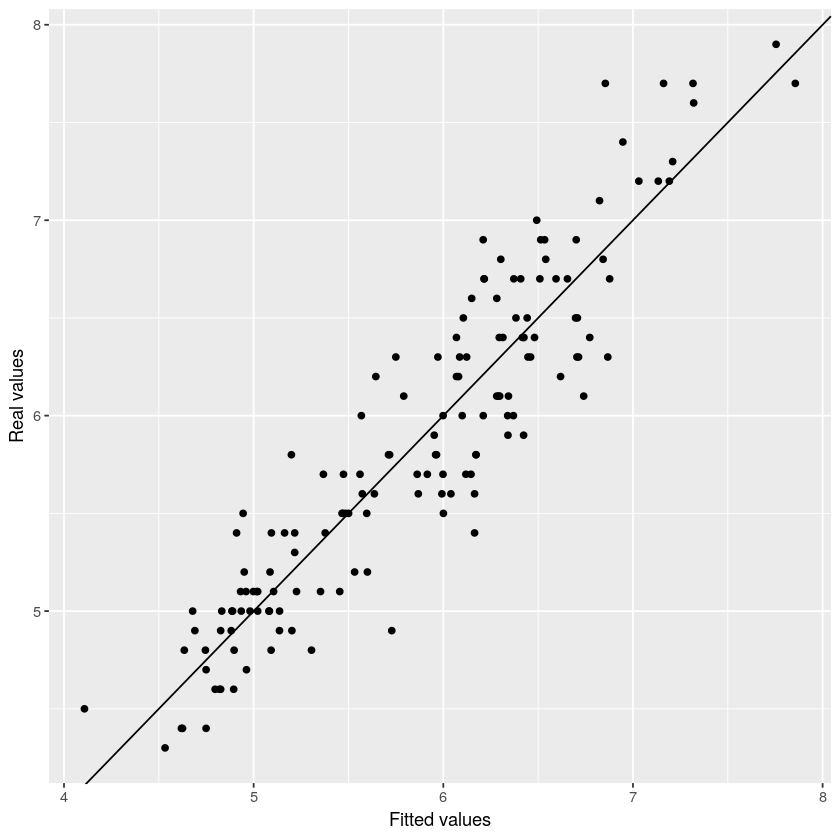

In [36]:
mod <- reg(iris$Sepal.Length, iris[,2:4])
cor(iris$Sepal.Length, mod$fitted.values)
ggplot() +
  geom_point(aes(x=mod$fitted.values,
                 y=iris$Sepal.Length)) +
  geom_abline() +
  xlab("Fitted values") +
  ylab("Real values")

Si possono quindi costruire delle funzioni per la nuova classe in modo da poterle chiamare con delle _funzioni generiche_: in R, funzioni come `print` o `summary` chiamano una funzione specifica in base al tipo dell'oggetto in questione.

In [37]:
## see help(print) for args name
print.reg <- function(x, ...) {
  print(x$coefficients, ...)
}
mod

                   [,1]
Intercept     1.8559975
Sepal.Width   0.6508372
Petal.Length  0.7091320
Petal.Width  -0.5564827

In [38]:
summary.reg <- function(object, ...) {
  ste <- diag(object$covariance)
  tval <- object$coefficients / ste  # Wald test
  pval <- 2 * pt(-abs(tval), object$df)
  cbind(coef=object$coefficients,
        st.err=ste,
        t=tval,
        pval=pval)
}
summary(mod)

,,st.err,,
Intercept,1.8559975,14.84117,0.125057362,0.9006502
Sepal.Width,0.6508372,141.52539,0.004598731,0.9963370
Petal.Length,0.7091320,255.53624,0.002775074,0.9977896
Petal.Width,-0.5564827,29.91287,-0.018603452,0.9851828
